## Sentiment Analysis on US Airline Reviews

In [1]:
#importing neccessary libraries

import pandas as pd
import matplotlib.pyplot as plt


In [2]:
#reading dataset

df = pd.read_csv("Tweets.csv")
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


#### data cleaning

In [3]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [10]:
# removing unnecessary columns

In [4]:
tweet_df = df[['text','airline_sentiment']]
print(tweet_df.shape)
tweet_df.head(5)

(14640, 2)


,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


In [11]:
# keeeping only positve and negative reviews and removing neutral reviews

In [5]:
tweet_df = tweet_df[tweet_df['airline_sentiment'] != 'neutral']
print(tweet_df.shape)
tweet_df.head(5)

(11541, 2)


,text,airline_sentiment
1,@VirginAmerica plus you've added commercials t...,positive
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative
5,@VirginAmerica seriously would pay $30 a fligh...,negative
6,"@VirginAmerica yes, nearly every time I fly VX...",positive


In [6]:
tweet_df["airline_sentiment"].value_counts()

airline_sentiment
negative    9178
positive    2363
Name: count, dtype: int64

In [12]:
# mapping postive and negative values to 0 and 1

In [7]:
sentiment_label = tweet_df.airline_sentiment.factorize()
sentiment_label

(array([0, 1, 1, ..., 0, 1, 1], dtype=int64),
 Index(['positive', 'negative'], dtype='object'))

In [22]:
x = tweet_df.text
for i in x:
    res = i.split()
    print(res)

    

['@VirginAmerica', 'plus', "you've", 'added', 'commercials', 'to', 'the', 'experience...', 'tacky.']
['@VirginAmerica', "it's", 'really', 'aggressive', 'to', 'blast', 'obnoxious', '"entertainment"', 'in', 'your', "guests'", 'faces', '&amp;', 'they', 'have', 'little', 'recourse']
['@VirginAmerica', 'and', "it's", 'a', 'really', 'big', 'bad', 'thing', 'about', 'it']
['@VirginAmerica', 'seriously', 'would', 'pay', '$30', 'a', 'flight', 'for', 'seats', 'that', "didn't", 'have', 'this', 'playing.', "it's", 'really', 'the', 'only', 'bad', 'thing', 'about', 'flying', 'VA']
['@VirginAmerica', 'yes,', 'nearly', 'every', 'time', 'I', 'fly', 'VX', 'this', '“ear', 'worm”', 'won’t', 'go', 'away', ':)']
['@virginamerica', 'Well,', 'I', "didn't…but", 'NOW', 'I', 'DO!', ':-D']
['@VirginAmerica', 'it', 'was', 'amazing,', 'and', 'arrived', 'an', 'hour', 'early.', "You're", 'too', 'good', 'to', 'me.']
['@VirginAmerica', 'I', '&lt;3', 'pretty', 'graphics.', 'so', 'much', 'better', 'than', 'minimal', 'icon

In [38]:
# tokenizing the given text with tokenizer instance with min of 5000 words

In [37]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [27]:
tweet = tweet_df.text.values
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(tweet)

In [28]:
vocab_size = len(tokenizer.word_index) + 1
vocab_size

13234

In [30]:
# converting the original tweet texts into sequences of integers

In [29]:
encoded_docs = tokenizer.texts_to_sequences(tweet)
encoded_docs

[[103, 575, 530, 1287, 2416, 1, 2, 177],
 [103, 88, 124, 3255, 1, 4076, 4077, 957, 15, 20, 4078, 58, 56, 25, 482, 2417],
 [103, 9, 88, 4, 124, 439, 196, 483, 86, 21],
 [103,
  388,
  83,
  281,
  219,
  4,
  8,
  7,
  205,
  28,
  198,
  25,
  29,
  2167,
  88,
  124,
  2,
  122,
  196,
  483,
  86,
  151,
  1977],
 [103, 184, 1348, 297, 49, 3, 114, 2418, 29, 1978, 150, 450],
 [103, 233, 3, 35, 3, 54, 1225],
 [103, 21, 22, 337, 9, 521, 40, 77, 347, 231, 174, 138, 1, 19],
 [103, 3, 710, 97, 650, 44, 172, 203, 154, 1225],
 [103,
  29,
  14,
  543,
  4,
  110,
  669,
  226,
  1603,
  86,
  11,
  636,
  207,
  1,
  58,
  3,
  365,
  126,
  864,
  10,
  11,
  406,
  207,
  252,
  1705],
 [103,
  60,
  151,
  20,
  1825,
  1510,
  96,
  112,
  160,
  62,
  2,
  1706,
  450,
  39,
  197,
  53,
  47,
  50],
 [103, 34],
 [103, 317, 1511, 958, 14, 66, 711],
 [103,
  44,
  879,
  7,
  11,
  166,
  1288,
  844,
  8,
  291,
  1,
  682,
  118,
  552,
  229,
  31,
  110,
  494,
  86,
  1103,
  1422],

In [31]:
# applying pad sequence instance to ensure that all sequences have same length

In [32]:
padded_sequence = pad_sequences(encoded_docs, maxlen=200)
padded_sequence

array([[   0,    0,    0, ...,    1,    2,  177],
       [   0,    0,    0, ...,   25,  482, 2417],
       [   0,    0,    0, ...,  483,   86,   21],
       ...,
       [   0,    0,    0, ...,    8,    1,  480],
       [   0,    0,    0, ..., 1682,   45,  945],
       [   0,    0,    0, ...,  144,   11, 2325]])

In [33]:
# tokenizer.word_index is a dictionary that maps words to their respective integer indices.

In [34]:
print(tokenizer.word_index)

{'to': 1, 'the': 2, 'i': 3, 'a': 4, 'united': 5, 'you': 6, 'for': 7, 'flight': 8, 'and': 9, 'on': 10, 'my': 11, 'usairways': 12, 'americanair': 13, 'is': 14, 'in': 15, 'southwestair': 16, 'of': 17, 'jetblue': 18, 'me': 19, 'your': 20, 'it': 21, 'was': 22, 'not': 23, 'no': 24, 'have': 25, 'at': 26, 'with': 27, 'that': 28, 'this': 29, 'get': 30, 'but': 31, 'be': 32, 'cancelled': 33, 'thanks': 34, 'now': 35, 'service': 36, 'are': 37, 'we': 38, 'from': 39, 'an': 40, 'been': 41, 'just': 42, '2': 43, 'so': 44, 'customer': 45, 'help': 46, 't': 47, 'can': 48, 'time': 49, 'co': 50, 'up': 51, 'hours': 52, 'http': 53, 'do': 54, 'hold': 55, 'they': 56, 'out': 57, 'amp': 58, 'plane': 59, "i'm": 60, 'us': 61, 'all': 62, 'will': 63, 'why': 64, 'thank': 65, 'still': 66, 'our': 67, 'delayed': 68, 'what': 69, 'when': 70, 'how': 71, 'one': 72, "can't": 73, 'flights': 74, 'call': 75, 'gate': 76, 'hour': 77, 'had': 78, 'flightled': 79, 'back': 80, 'bag': 81, 'if': 82, 'would': 83, 'after': 84, 'has': 85, '

In [35]:
print(tweet[0])
print(encoded_docs[0])

@VirginAmerica plus you've added commercials to the experience... tacky.
[103, 575, 530, 1287, 2416, 1, 2, 177]


In [36]:
print(padded_sequence[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0  103  575  530 1287
 2416 

## Building a model using Neural Networks

In [39]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import LSTM, Embedding

In [40]:
model = Sequential() 

In [41]:
# The Embedding layer is responsible for converting integer-encoded words into dense vectors of fixed size

In [42]:
embedding_vector_length = 32
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200) )

In [43]:
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid')) 

In [44]:
# comiling the model

In [45]:
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])  
print(model.summary()) 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           423488    
                                                                 
 spatial_dropout1d (Spatial  (None, 200, 32)           0         
 Dropout1D)                                                      
                                                                 
 lstm (LSTM)                 (None, 50)                16600     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 440139 (1.68 MB)
Trainable params: 440139 (1.68 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [48]:
# fitting model with the data as x = tweet text and y = postive review or negative review

In [47]:
history = model.fit(padded_sequence,sentiment_label[0],validation_split=0.2, epochs=2, batch_size=32)

Epoch 1/2
289/289 [==============================] - 56s 181ms/step - loss: 0.3947 - accuracy: 0.8358 - val_loss: 0.2088 - val_accuracy: 0.9203
Epoch 2/2
289/289 [==============================] - 54s 188ms/step - loss: 0.2231 - accuracy: 0.9133 - val_loss: 0.1843 - val_accuracy: 0.9190


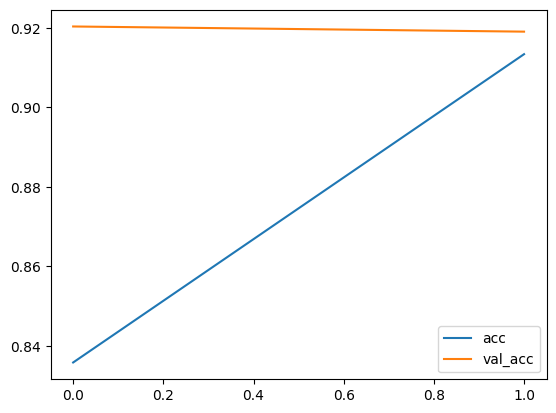

<Figure size 640x480 with 0 Axes>

In [49]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()
plt.savefig("Accuracy plot.jpg")

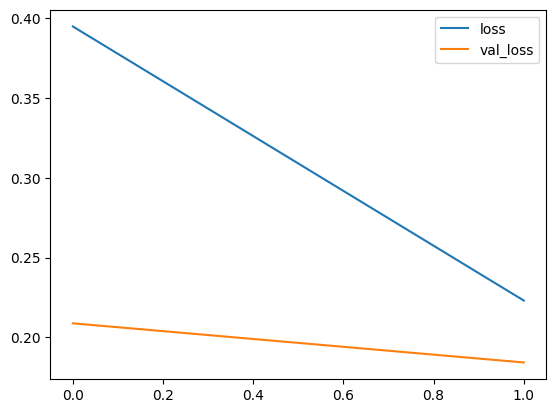

<Figure size 640x480 with 0 Axes>

In [50]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.savefig("Loss plot.jpg")

## Testing the model

In [51]:
def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    print("Predicted label: ", sentiment_label[1][prediction])

In [62]:
test_sentence1 = "worst experiecnce"
predict_sentiment(test_sentence1)

test_sentence2 = "very comfortable"
predict_sentiment(test_sentence2)

1/1 [==============================] - 0s 33ms/step
Predicted label:  negative
1/1 [==============================] - 0s 32ms/step
Predicted label:  positive
